# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [19]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [20]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [21]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [37, 270, 340]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,15168,10556,12477,1920,6506,714
1,4720,1032,975,5500,197,56
2,381,4025,9670,388,7271,1371


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** The above chosen samples are clearly distinguished from each other by one or more features/categories. 
The firt one can be a big all purpose market- selling various commodities.
The second one a rather small sized establishment with mainly focussing on frozen and fresh products , it can be more of frozen foods market or a foodstall.
The third one is focussed on detergents_paper and grocery , this is mainly a medium sized market.
The larger of the three is the first one followed by second and third almost about the same size.

By comparing it with the mean we can see the first one is a very big establishment as it's money spent on individual features is much greatere than the mean hence it can most probably be a Hotel or a Big retail shop.
Moving on to the second one it's quite small since the money spent is quite less than the mean of each individual category. It's quite a small establishment.
As for the third one it's a medium sized establishment as for some categories it's expenditure is greater than mean and for some less than mean.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = pd.read_csv("customers.csv")
new_data.drop(['Fresh','Region', 'Channel'],axis = 1,inplace = True)
new_dat_target = data['Fresh']

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Fresh'], test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
# regressor = DecisionTreeRegressor(max_depth=2)
# regressor = DecisionTreeRegressor(max_depth=10)
# regressor = DecisionTreeRegressor(max_depth=50)
# regressor = DecisionTreeRegressor(max_depth=100)
regressor = DecisionTreeRegressor(max_depth=500,random_state=0)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = r2_score(y_test,regressor.predict(X_test))
print score

-0.252469807688


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I attempted to predict the Fresh feature because at first it seemed to me that it somewhat depends on Grocery,Milk & Frozen features. The reported prediction score is -0.252469807688. This feature is necessary because buying fresh products signifies how much that establishment is ready to spend on the food in a month/year. Fresh products are a necessity for any establishment and is a very good prediction feature. 
The negative r2_score siginifies that the model failed to fit the data. Even after trying with various depths still the Decision tree was unsuccessful.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


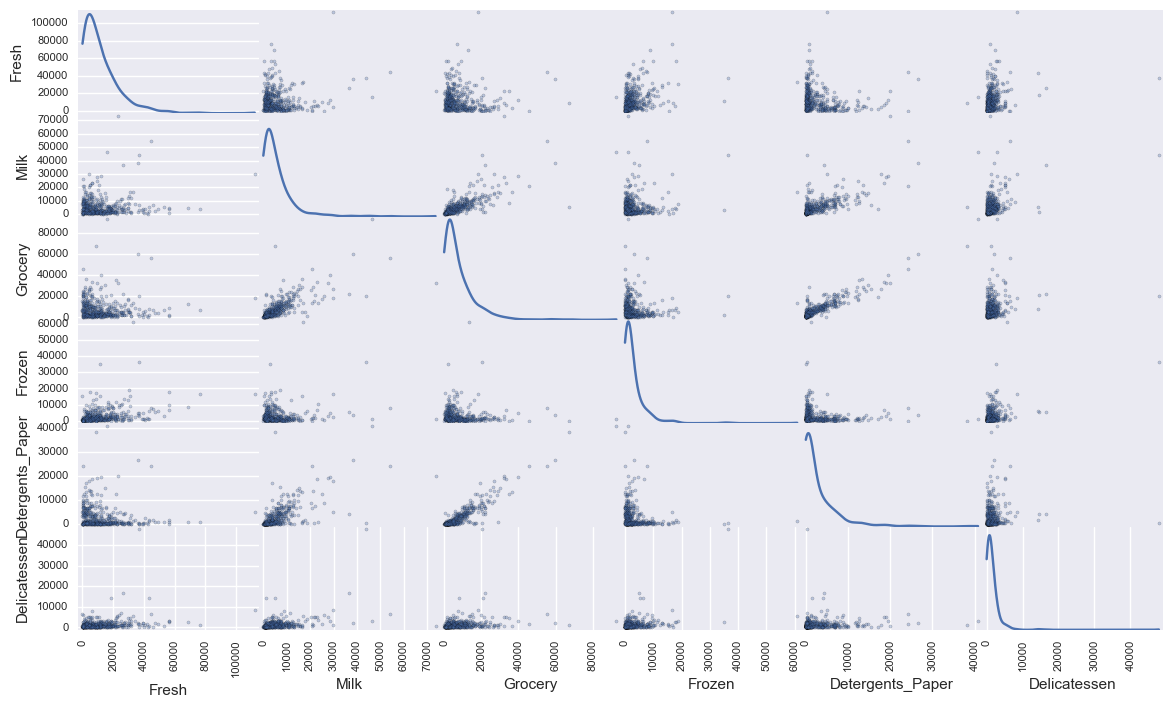

In [23]:
# import seaborn as sns
# Produce a scatter matrix for each pair of features in the data

# sns.heatmap(data.corr(), annot = 'True')

pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
data.corr()
# print ""


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** The following features exhibit some degree of correlation : - (data.corr() helped quite a lot)

Using the above data.corr() table I can easily identify which features are positively/negatively correlated(having a absolute value > 0.5).

1. Fresh -  somewhat to Frozen( but actually nothing has a value > 0.5)
2. Milk - Grocery & Detergents_paper
3. Grocery - Milk & Detergents_paper
4. Frozen -  somewhat to Fresh & Delicatessen( but actually nothing has a value > 0.5)
5. Detergents_paper - Milk & Grocery
6. Delicatessen - Milk & Frozen ( but actually nothing has a value > 0.5)

It denies my suspicions since Fresh is directly related to many of the features as seen from above. Data for distirbutions given above is positively skewed for some and increasing for others as observed above , whereby most of the data points lie near the origin and peaks also lying near the origin. I believe Frozen might be a good predictor since as mentioned above it doesn't have much relation to other features unlike the others

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

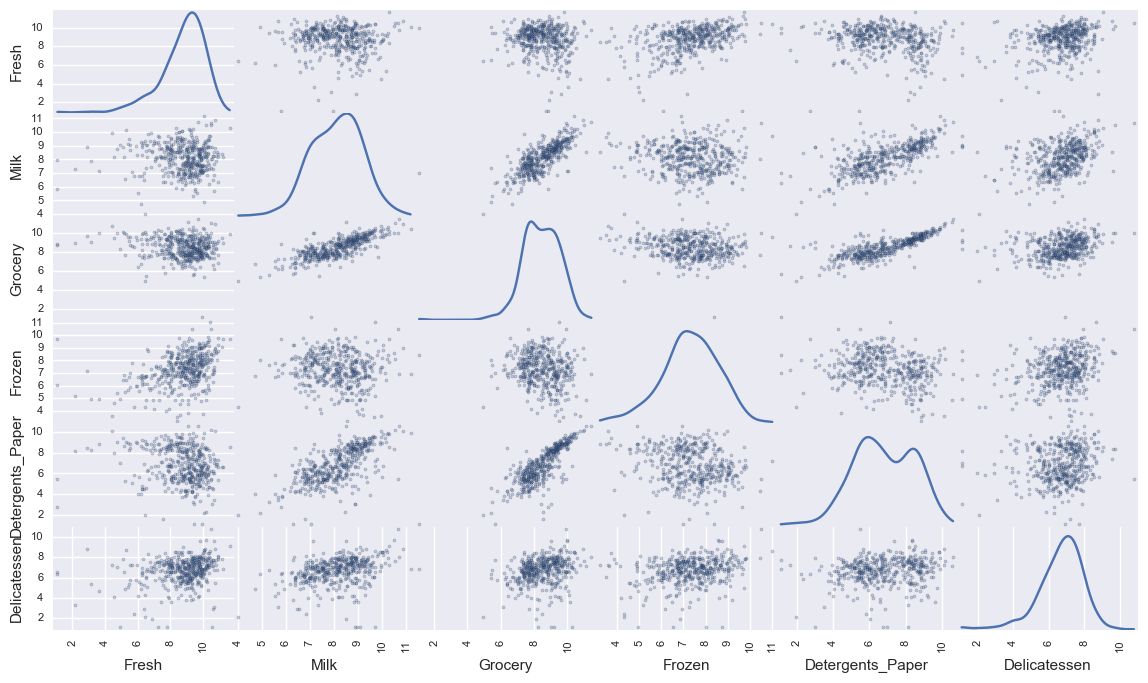

In [24]:
from scipy import stats
import numpy as np
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)
# xt,yt,zt = stats.boxcox(data)


# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [25]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.626943,9.264450,9.431642,7.560080,8.780480,6.570883
1,8.459564,6.939254,6.882437,8.612503,5.283204,4.025352
2,5.942799,8.300280,9.176784,5.961005,8.891649,7.223296


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [26]:
# For each feature find the data points with extreme high or low values
from sets import Set
from collections import Counter
outlier = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 =  np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(np.exp(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]))
    lister = []
    lister = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    for i in range(len(lister)):
        outlier.append(lister[i])
    
# OPTIONAL: Select the indices for data points you wish to remove

temp = []
outliers = []

#Counting the indices that are outliers in more than one features

for i in range(len(outlier)):
    count = 0
    for j in range(len(outlier)):
        if outlier[i]==outlier[j]:
            count+=1
    if count > 1:
        temp.append(outlier[i])

#Removing Duplicate occurances of index numbers as they had count of them >1 using a Set
        
temp = Set(temp)
length = len(temp)
for i in range(length):
    outliers.append(temp.pop())
print outliers
# Remove the outliers, if any were specified
outliers.sort()
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
data.ix[outliers]

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85.0,20959.0,45828.0,36.0,24231.0,1423.0
66,9.0,1534.0,7417.0,175.0,3468.0,27.0
81,219.0,9540.0,14403.0,283.0,7818.0,156.0
95,3.0,2920.0,6252.0,440.0,223.0,709.0
96,23.0,2616.0,8118.0,145.0,3874.0,217.0
128,140.0,8847.0,3823.0,142.0,1062.0,3.0
171,200.0,25862.0,19816.0,651.0,8773.0,6250.0
193,180.0,3485.0,20292.0,959.0,5618.0,666.0
218,18.0,7504.0,15205.0,1285.0,4797.0,6372.0
304,161.0,7460.0,24773.0,617.0,11783.0,2410.0


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,22925.0,73498.0,32114.0,987.0,20070.0,903.0
98,503.0,112.0,778.0,895.0,56.0,132.0
154,622.0,55.0,137.0,75.0,7.0,8.0
356,22686.0,134.0,218.0,3157.0,9.0,548.0


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,20398.0,1137.0,3.0,4407.0,3.0,975.0
154,622.0,55.0,137.0,75.0,7.0,8.0


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,4591.0,15729.0,16709.0,33.0,6956.0,433.0
57,5417.0,9933.0,10487.0,38.0,7572.0,1282.0
65,85.0,20959.0,45828.0,36.0,24231.0,1423.0
145,22039.0,8384.0,34792.0,42.0,12591.0,4430.0
175,2343.0,7845.0,11874.0,52.0,4196.0,1697.0
264,1073.0,9679.0,15445.0,61.0,5980.0,1265.0
325,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0
420,4456.0,5266.0,13227.0,25.0,6818.0,1393.0
429,8607.0,1750.0,3580.0,47.0,84.0,2501.0
439,2787.0,1698.0,2510.0,65.0,477.0,52.0


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,20398.0,1137.0,3.0,4407.0,3.0,975.0
161,12434.0,540.0,283.0,1092.0,3.0,2233.0


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,9.0,1534.0,7417.0,175.0,3468.0,27.0
109,1406.0,16729.0,28986.0,673.0,836.0,3.0
128,140.0,8847.0,3823.0,142.0,1062.0,3.0
137,3087.0,8080.0,8282.0,661.0,721.0,36.0
142,37036.0,7152.0,8253.0,2995.0,20.0,3.0
154,622.0,55.0,137.0,75.0,7.0,8.0
183,36847.0,43950.0,20170.0,36534.0,239.0,47943.0
184,327.0,918.0,4710.0,74.0,334.0,11.0
187,2438.0,8002.0,9819.0,6269.0,3459.0,3.0
203,583.0,685.0,2216.0,469.0,954.0,18.0


[128, 65, 66, 75, 154]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975
128,140,8847,3823,142,1062,3
154,622,55,137,75,7,8


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes as done above there are 5 indices/rows that are outliers for more than one features above. They should mostly be removed because since there might be some situations where one feature out of 6 might not be used to predict a value/classification label or to produce any result , and an outlier for such case is not needed to remove. However there is a very low chance that it can appear as an outlier for more than 1 feature since the total number of features is 6 and 2 features not being used is not so common and moreover such an easy pattern will not exhibited by the data as described by the above problem statement(project).
Hence all those rows/indexes which appeared as outliers in more than one feature were removed as the probability of them being actually an outlier is more and moreover PCA is affected a lot by outliers hence to improve the results of PCA and our further use they were removed.

According to data.corr() we know approxiamtely the relation of features with each other. So if one feature has a low value then the other feature too should be having a proportional value as expressed by the data.corr() ( for all those have correaltion > 0.5). Moreover the outliers that were present in more than one feature ensure that they are necessarily outliers since there might be some situations that an outlier only in 1 feature might be expressing facts about data and it might not be necessary to remove since it might be fitting out algorithm pretty well.
Hence if wrong outliers are removed the variance will decrease and the maximum information from a data decreases so there might be case that PCA is performing badly in such scenarios hence outliers should be removed with care.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


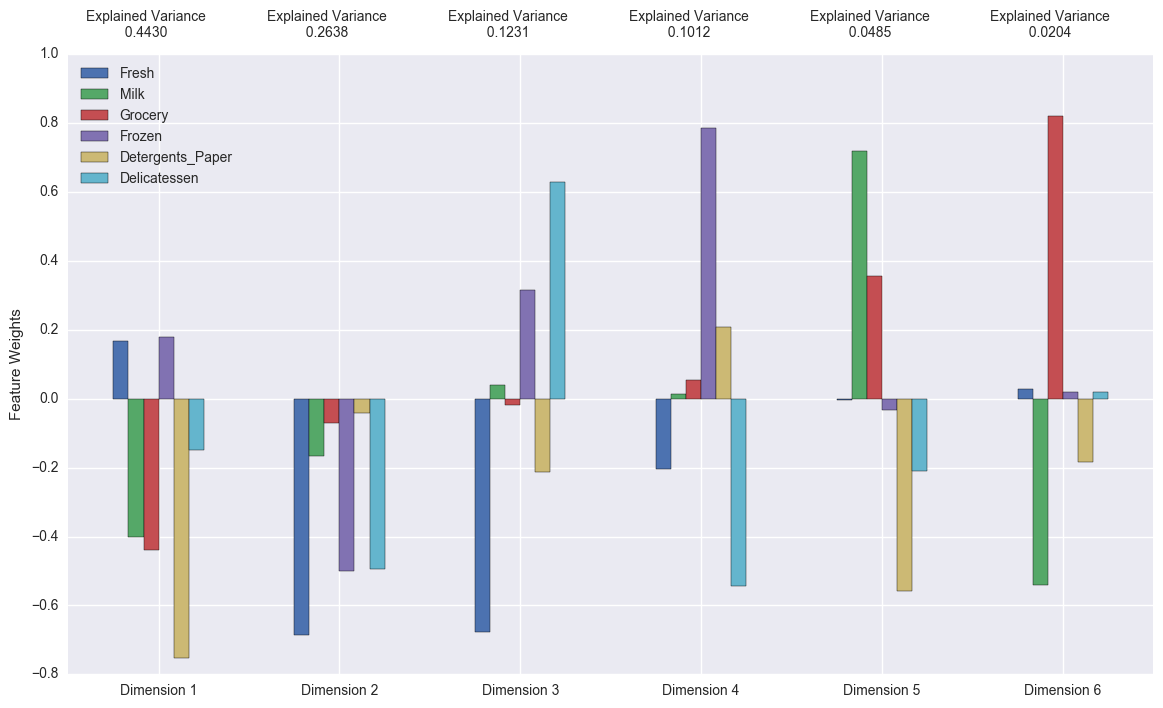

In [27]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The total variance explained by first and second component is 0.4430+0.2638 = 0.7068 and for the first 4 principal components it is 0.9311.
We can generally say each dimension actually explains how much a customer is spending on the 6 independent features, although to maximize variance each feature has a weight so other features do account too in each of the Principal components.
Generally the Principal Components represent(those which have high relationship/higher absolute value of weights in the 6 PC's) :-

1. Detergents_paper(mainly) hence the customer is a retailer.
2. Fresh + Frozen + Delicatesssen , all the 3 vary together here , hence the customer is representing a restaraunt/hotel/cafe.
3. Delicatessen  + Fresh, here however Delicatessen and Fresh are kind of inversely proportional i.e if the value of 3rd PC increases then either value of Delicatessen increase or Fresh decreases, hence the customer is representing a Bakery/Cafe etc.
4. Frozen(mainly) + Delicatessen, here too both features vary inversely with each other with Frozen having a direct relationship whereas Delicatessen an inverse realtionship , Customer -- Retailer
5. Milk + Detergents_paper, here too both features vary inversely with each other with Milk having a direct relationship whereas Detergents_paper an inverse realtionship,the value of 5th PC increases then either value of Milk increase or Detergents_paper decreases , hence this customer is mostly representing a retailer.
6. Grocery + Milk, here too both features vary inversely with each other with Grocery having a direct relationship whereas Milk an inverse realtionship  , hence this customer is mostly representing retailer.

Various types of customers mentioned above will have high value in their particular PCA dimension/component.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [ ]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

indices = [37,270,340]

print "Only those rows selected in sample after successful application of PCA after removals of outliers etc , since sample data doesn't contain the indices of outliers so none was removed."
temper = pd.DataFrame(pca_samples, columns = data.keys()).reset_index(drop = True)

display(temper)
print "Just log of the sample data selected earlier i.e the three indicies namely 37,270,340"
display(log_samples) #indices 37,270,340

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [30]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [31]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.1660,-0.9897
1,2.8857,1.2597
2,-2.7506,2.1899


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**  Advantages of using K-Means is that it's very simple to implement and improve. We can specify the algorithm for different number of clusters and different cluster centres just by simply changing a parameter passed to function and it does it for us. The algorithm has a low complexity as compared to other clustering algorithms. Moreover if we want any data point to be fixed for a cluster and not get involved with the probability of it being involved to more than one cluster ,i.e, simply putting up we want simple clusters then this is the best algorithm.However it is prone to outliers and noise.

Gaussian Mixture Model is different from K-Means. It's a lot more flexible in terms of cluster covariance.With GMM, each cluster can have unconstrained covariance structure.GMM model accommodates mixed membership.In GMM a point belongs to each cluster to a different degree. The degree is based on the probability of the point being generated from each cluster’s (multivariate) normal distribution, with cluster center as the distribution’s mean and cluster covariance as its covariance. This is more complex model and usually it takes a lot of time to develop and train, further it creates a more accurate model.

As from PCA it is evident that many features play a crucial role for the variance ratio in 1 dimension hence there might be a chance that few data points might be considered in one or more than one dimension/cluster and since K-Means is not good with that , since it does not deal with the probability the point came from a Cluster X hence we will be using **GMM** here. 

Some resources referred :-

http://scikit-learn.org/stable/modules/mixture.html#gmm-classifier

https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [32]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
# cluster_number =[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
all_score=[]
i=2
while i<=50:
    clusterer = GaussianMixture(n_components=i)
    clusterer.fit(reduced_data)
   
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    all_score.append(score)
    print i, score
    i+=1
print max(all_score)
clusterer = GaussianMixture(n_components=2)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data,preds,metric='mahalanobis')

# When no outlier was removed it was observed that cluster number might also be chosen to be 3, i.e. the distance between their
# scores decrease.

2 0.422324682646
3 0.37420184754
4 0.31136972666
5 0.300145405915
6 0.28418930274
7 0.331670506597
8 0.301354280629
9 0.322874815072
10 0.293560397008
11 0.313261152354
12 0.300172452404
13 0.289495228182
14 0.284498737611
15 0.272173365991
16 0.304300778179
17 0.306257168505
18 0.332799123561
19 0.283430586848
20 0.26951056989
21 0.309607654904
22 0.282063331836
23 0.284367998232
24 0.304559454801
25 0.217471415583
26 0.299503045754
27 0.285688458023
28 0.253449005828
29 0.320543366092
30 0.289064960282
31 0.287936666532
32 0.278152187431
33 0.308039626563
34 0.30247343115
35 0.296847212561
36 0.289637001372
37 0.339562521683
38 0.236189906135
39 0.255455599938
40 0.296906223999
41 0.280367543555
42 0.273276791513
43 0.311066166413
44 0.291556381429
45 0.301972919012
46 0.234061624704
47 0.337055083708
48 0.26304612373
49 0.329628830903
50 0.287500558968
0.422324682646


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** The Silhouette score are as follows which can be seen from the output of the above code. I tried it for cluster number 2 - 50 and the best reported score was of cluster number = 2 which is 0.421916846463. The second maximum is for cluster number 3. After visualizing the data from the code below I decided there are actually 2 clusters rather than 3 clusters.

Choosing and removing outliers is a very important step as after my first review I actually gave a try of removing different set of outliers and not removing any outlier and it seems that with cluster number 3 I was getting a Better Silhouette Score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

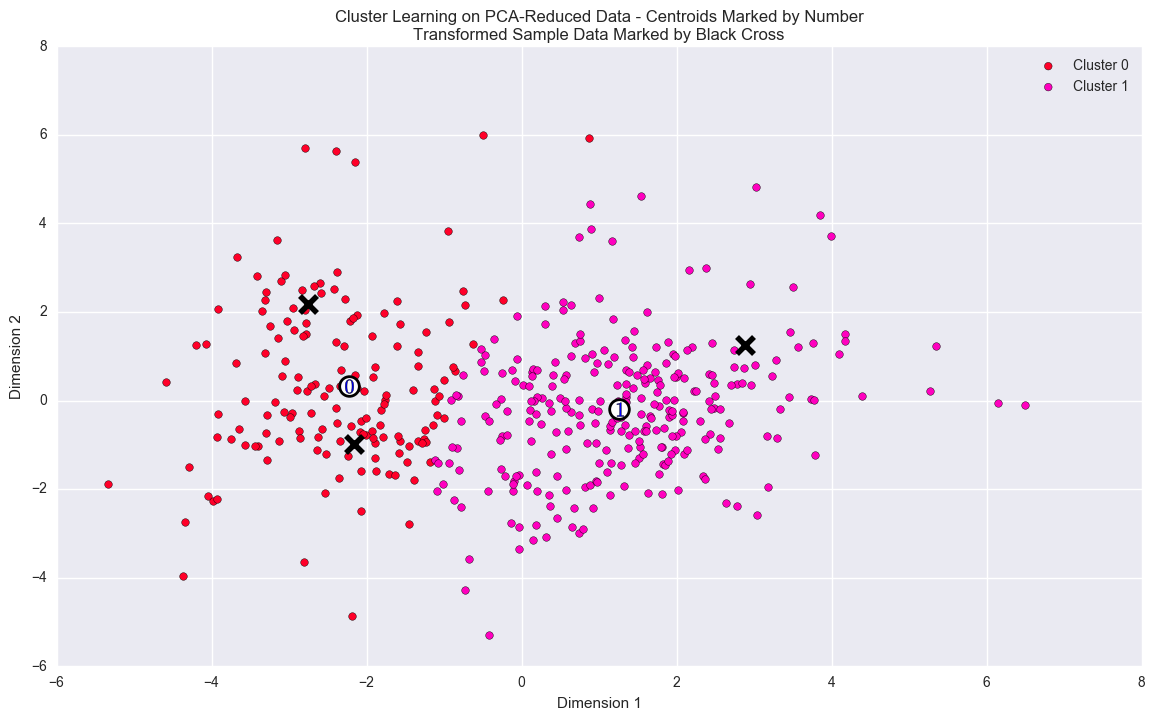

In [33]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


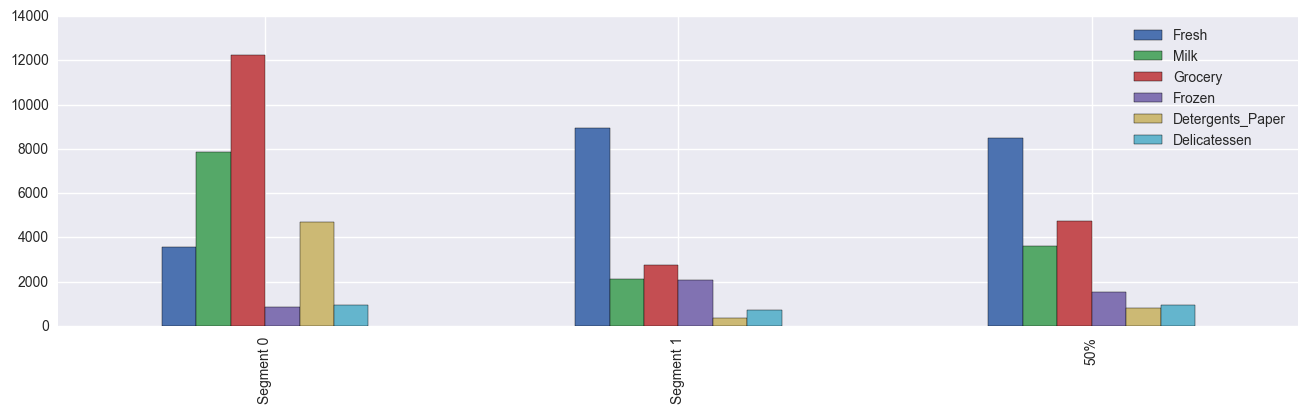

In [36]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

temp_centers = true_centers
temp = temp_centers.append(data.describe().ix['50%'])
temp.plot(kind = 'bar', figsize = (16, 4))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** There are mainly 2 establishments :

1. Focussed on buying Milk,Grocery and Detergents_paper.
2. Focussed on buy Fresh products and Frozen products.

Since the centres can be treated as the mean of the cluster hence the total money spend by centre of Segment 0 is 29,174 and Segment 1 is 16,992. Hence generally the money spend by points belonging to Cluster/Segment 0 Spend more(bigger establishments).
Considering only their centers it appears Segment 0 is a bigger establishment than Segment 1. Generally we can say Segment 1 is focussed on different products as compared to Segment 0 and Segment 0 is a bigger establishment/richer than Segment 1.

Segment 0 - Retailers (quite a few,very less)

Segment 1 - Cafe/Hotel/Restaraunt Mainly

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [38]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
for i,j in enumerate(pca_samples):
    print "Probability of Sample {}: {}".format(i,clusterer.predict_proba([j])[0])

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0
Probability of Sample 0: [ 0.8829047  0.1170953]
Probability of Sample 1: [  8.53983321e-05   9.99914602e-01]
Probability of Sample 2: [ 0.99683  0.00317]


**Answer:** Sample point 0 & 2 are foucussed more / buy more from features - Milk,Groceery, Detergents_paper and Sample point 1 is focussed on Fresh Frozen products. Moreover Sample point 0 & 2 are bigger establishments than Sample point 1.

Yes the predictions of the sample point are consistent with my result. Sample point 0 & 2 are foucussed on the products as they are supposed to if they are from Segment 0 and same is the case for Sample point 1 if it is from Segment 1. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Buying products whose quality degrade over time or those that are needed on a daily basis need to be delivered as soon as possible to the customer so as to avoid the delay in work. Delivery of **FRESH** products shouldn't be delayed(or required on maximum days). Hence reducing the delivery days will mainly affect the Segment 1 Customers and some(very less/few) of the Customers of Segment 0 too since quality of **MILK** and **GROCERY** degrade over time, however that is a slow process, and such things are required on a daily basis. 

**This change moreover will not affect all the customers equally.** 

**Customers who have a high demand for **FROZEN** ,  **DETERGENTS_PAPER** would react positively completely.**

**The establishments that deal with supply of **Fresh Products** such as Hotel/cafe would react negatively as opposed to the Retail establishments.**

A/B Tests would be done on the fact , that 2 groups of customers like retailer & hotel/cafe establishments will be the experimental groups(likely the ones which are the cluster centres) and a test would be done in the following way where the control group is their whole cluster. Two groups will be selected , one belonging completely to each establishment/Cluster and then those groups will first be divided into two equal halves and then first half of group would be using 3 days delivery and the other one 5 days delivery. The demand for about a week for these 2 Segments will be observed and if rate of demand of products of first half of the segment decreases more than the second half then 5 days would be alloted to that customer/establishment other wise vice-versa.

Customes->50%Semgent 1 +50%Segment 0 -> 50% ( 3 days ) 50% ( 5 Days)[Segment 0 ]  & 50% ( 3 days ) 50% ( 5 Days)[Segment 1 ]

This would be the A/B testing and for the result we could see if the establishment is dissatisfied with the new delivery service by observing his consumption rates and more over observing the products he is ordering, like those that need to be delivered on a regular basis v/s those that have a long expiration date.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** Each segment has different amount spended on different features and since we have an idea about that we can classify the customer to each segment. Moreover if the above algorithm doesn't work then total spending might help since we know that Segment 0 spends more in most cases than Segment 1(overall).Generally Segment 1 is negatively effected as opposed to Segment 0.
Overall summing it up through the means of unsupervised learning we get to know two sets of establishments mainly and through PCA we quite have a good idea as to how each feature differently corresponds to the different segment.

Using A/B testing we can actually predict the preferred delivery time for each segment.We can then train a supervised model on a label -> Cluster_label which was received through A/B testing.This label is the feature that we will have to predict for the data left after selecting data for A/B testing. So we can either use Decision Trees or SVM to bring out the exact equation of the target variable in terms of 6 features. Even neural nets might work since we can assign weights to features as PCA does and since we used IQR to remove the outliers there might be a less chance that our supervised learning overfits to the data.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

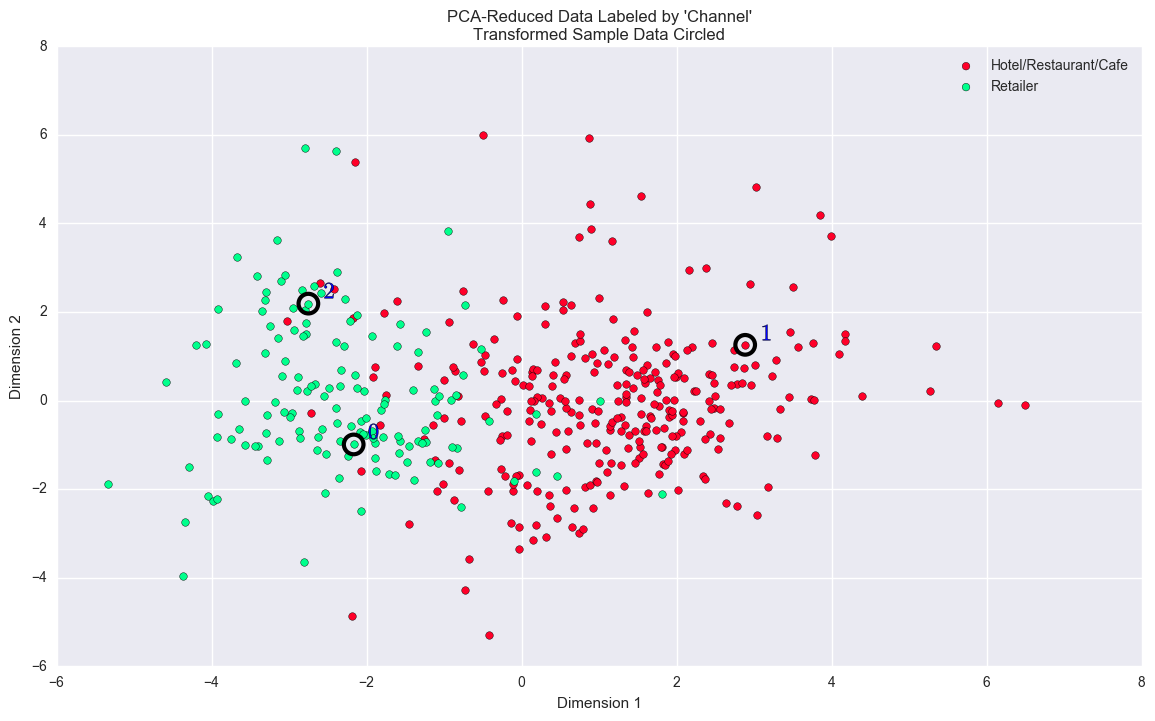

In [39]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering algorithm chosen and number of clusters chosen Compare very well to the above distribution if Region & Channel were not removed. The clustering is quite accurate , althouth there are some special cases , I would say that might have been wrongly classified in the segment but the ratio of wrongly labelled customers is very low. No each customer has some probability of belonging to other segment although that might be close to 0.000000000001 but still it might be there. Hence this might be a kind of drawback in the algorithm since we can't strictly classify any customer to one segment , however this helps us by not classifying points wrongly to clusters and bring out the actual pattern in the data. The advantage is much more than the disadvantage that the disadvantage can be overlooked.

Yes my prediction on Segment 0 & Segment 1 focussing more on buying certain products and spending more on them is surely consistent with the above distribution of Hotel/Cafe/Restaurant & Retailer. As Hotel/Cafe/Restaurant needs delivery of Fresh products daily to serve the customers hence they might be negatively effected, whereas a retailed can deny if he/she doesn't have the product and it wouldn't affect him/her much.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.